# Databases and web interfaces

    Requirements:
    pip install pymysql
    pip install sqlalchemy
    pip install weblogo
    pip install flask
    pip install flask-wtf


## Connecting to a remote database server

    UCSC Genomes database
    http://genome.ucsc.edu/cgi-bin/hgTables

## Direct database access and object-oriented ORM method
## Using a python library with an object-oriented API
## Creating a web interface for a pipeline using Flask




In [81]:

# from ucsc.db import create_session
# from ucsc.config import use_genome

# session = create_session('hg19')
# genome = use_genome('hg19')


from pprint import pprint

In [3]:
from sqlalchemy import *
# from sqlalchemy.ext.automap import automap_base

The typical usage of create_engine() is once per particular database URL, held globally for the lifetime of a single application process. A single Engine manages many individual DBAPI connections


It’s usually required that a separate Engine be used for each child process. This is because the Engine maintains a reference to a connection pool that ultimately references DBAPI connections - these tend to not be portable across process boundaries

Here I am disabling connection pooling by Engine in order to use it in a Jupyter workbook

In [139]:
from sqlalchemy.pool import NullPool

engine = create_engine('mysql+pymysql://genome@genome-mysql.cse.ucsc.edu/hg38', poolclass=NullPool)  # , echo=True

The connection is an instance of Connection, which is a proxy object for an actual DBAPI connection. The DBAPI connection is retrieved from the connection pool at the point at which Connection is created.

In [140]:
connection = engine.connect()
result = connection.execute("SHOW TABLES")
for row in result:
    print("Table:", row[0])
connection.close()

Table: affyGnf1h
Table: affyU133
Table: affyU95
Table: all_est
Table: all_mrna
Table: all_sts_primer
Table: all_sts_seq
Table: altLocations
Table: altSeqLiftOverPsl
Table: altSeqLiftOverPslP3
Table: altSeqLiftOverPslP6
Table: altSeqLiftOverPslP7
Table: augustusGene
Table: bigFiles
Table: bioCycMapDesc
Table: bioCycPathway
Table: ccdsGene
Table: ccdsInfo
Table: ccdsKgMap
Table: ccdsNotes
Table: ceBlastTab
Table: centromeres
Table: cgapAlias
Table: cgapBiocDesc
Table: cgapBiocPathway
Table: chainBosTau8
Table: chainBosTau8Link
Table: chainCanFam3
Table: chainCanFam3Link
Table: chainChlSab2
Table: chainChlSab2Link
Table: chainDanRer10
Table: chainDanRer10Link
Table: chainFelCat8
Table: chainFelCat8Link
Table: chainGalGal5
Table: chainGalGal5Link
Table: chainGalVar1
Table: chainGalVar1Link
Table: chainGorGor5
Table: chainGorGor5Link
Table: chainHg38Patch3
Table: chainHg38Patch3Link
Table: chainHg38Patch6
Table: chainHg38Patch6Link
Table: chainHg38Patch7
Table: chainHg38Patch7Link
Table: ch

In [8]:
# Connection supports context manager
with engine.connect() as connection:
    result = connection.execute("DESCRIBE refGene")
    for row in result:
        print("Columns:", row)

Columns: ('bin', 'smallint(5) unsigned', 'NO', '', None, '')
Columns: ('name', 'varchar(255)', 'NO', 'MUL', None, '')
Columns: ('chrom', 'varchar(255)', 'NO', 'MUL', None, '')
Columns: ('strand', 'char(1)', 'NO', '', None, '')
Columns: ('txStart', 'int(10) unsigned', 'NO', '', None, '')
Columns: ('txEnd', 'int(10) unsigned', 'NO', '', None, '')
Columns: ('cdsStart', 'int(10) unsigned', 'NO', '', None, '')
Columns: ('cdsEnd', 'int(10) unsigned', 'NO', '', None, '')
Columns: ('exonCount', 'int(10) unsigned', 'NO', '', None, '')
Columns: ('exonStarts', 'longblob', 'NO', '', None, '')
Columns: ('exonEnds', 'longblob', 'NO', '', None, '')
Columns: ('score', 'int(11)', 'YES', '', None, '')
Columns: ('name2', 'varchar(255)', 'NO', 'MUL', None, '')
Columns: ('cdsStartStat', "enum('none','unk','incmpl','cmpl')", 'NO', '', None, '')
Columns: ('cdsEndStat', "enum('none','unk','incmpl','cmpl')", 'NO', '', None, '')
Columns: ('exonFrames', 'longblob', 'NO', '', None, '')


In [13]:
# Engine can automatically take a connection from the pool
# SQL query - fetch all columns from the first 5 records
result = engine.execute("SELECT * FROM refGene LIMIT 5")
for i, row in enumerate(result):
    print("Record #", i)
    pprint(row)

Record # 0
(585, 'NR_046018', 'chr1', '+', 11873, 14409, 14409, 14409, 3, b'11873,12612,13220,', b'12227,12721,14409,', 0, 'DDX11L1', 'unk', 'unk', b'-1,-1,-1,')
Record # 1
(585, 'NR_024540', 'chr1', '-', 14361, 29370, 29370, 29370, 11, b'14361,14969,15795,16606,16857,17232,17605,17914,18267,24737,29320,', b'14829,15038,15947,16765,17055,17368,17742,18061,18366,24891,29370,', 0, 'WASH7P', 'unk', 'unk', b'-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,')
Record # 2
(1078, 'NR_104148', 'chr7', '+', 64666082, 64687830, 64687830, 64687830, 4, b'64666082,64669036,64679176,64684334,', b'64666285,64669178,64679336,64687830,', 0, 'ZNF107', 'unk', 'unk', b'-1,-1,-1,-1,')
Record # 3
(14, 'NR_111960', 'chrX', '+', 44873174, 45112612, 45112612, 45112612, 28, b'44873174,44873923,44961283,44974665,45010960,45020609,45034930,45037654,45051708,45053828,45059005,45059246,45060608,45061323,45063421,45069578,45076696,45078399,45079145,45082575,45082714,45083459,45085864,45089742,45090722,45107409,45110078,45111381,', 

In [20]:
# Selected columns
with engine.connect() as connection:
    result = connection.execute("SELECT name, name2, chrom, strand, cdsStart, cdsEnd FROM refGene LIMIT 5")
    for i, row in enumerate(result):
        print("Record #", i)
        print("\tGene {} ({})".format(row['name'], row['name2']))
        print("\tCDS location {} {}-{} on strand {}".format(row['chrom'], row['cdsStart'], row['cdsEnd'], row['strand']))

Record # 0
	Gene NR_046018 (DDX11L1)
	CDS location chr1 14409-14409 on strand +
Record # 1
	Gene NR_024540 (WASH7P)
	CDS location chr1 29370-29370 on strand -
Record # 2
	Gene NR_104148 (ZNF107)
	CDS location chr7 64687830-64687830 on strand +
Record # 3
	Gene NR_111960 (KDM6A)
	CDS location chrX 45112612-45112612 on strand +
Record # 4
	Gene NR_026818 (FAM138A)
	CDS location chr1 36081-36081 on strand -


In [22]:
# Selected columns and rows using SQL
with engine.connect() as connection:
    result = connection.execute("""
        SELECT
            name, name2, chrom, strand, cdsStart, cdsEnd
        FROM
            refGene
        WHERE
            name2='ZNF107'
        """)
    for i, row in enumerate(result):
        print("Record #", i)
        print("\tGene {} ({})".format(row['name'], row['name2']))
        print("\tCDS location {} {}-{} on strand {}".format(row['chrom'], row['cdsStart'], row['cdsEnd'], row['strand']))

Record # 0
	Gene NR_104148 (ZNF107)
	CDS location chr7 64687830-64687830 on strand +
Record # 1
	Gene NM_016220 (ZNF107)
	CDS location chr7 64691941-64708656 on strand +
Record # 2
	Gene NR_104149 (ZNF107)
	CDS location chr7 64687830-64687830 on strand +
Record # 3
	Gene NM_001282360 (ZNF107)
	CDS location chr7 64666282-64708656 on strand +
Record # 4
	Gene NM_001282359 (ZNF107)
	CDS location chr7 64666282-64708656 on strand +
Record # 5
	Gene NM_001013746 (ZNF107)
	CDS location chr7 64691941-64708656 on strand +


In [83]:
meta = MetaData(bind=engine)

# Usually we can then produce a set of mappings from this MetaData.
# Base = automap_base(bind=e, metadata=meta)

# calling prepare() just sets up mapped classes and relationships.
# Base.prepare()

# Then, the classes are ready
# Base.classes.refGene

# Unfortunately, not in this case - there are no primary keys and automap_base requires them

# Alternatively, we can use:
meta.reflect(only=['refGene', 'snp147Common'])

# knownGeneMrnahg38

# However, we need to modify metadata and add a primary key:
gene_table = Table('refGene',
    meta,
    PrimaryKeyConstraint('name'),
    extend_existing=True)

pprint(gene_table.columns.keys())
print()
print(gene_table.c.strand.name, gene_table.c.strand.type)


['bin',
 'name',
 'chrom',
 'strand',
 'txStart',
 'txEnd',
 'cdsStart',
 'cdsEnd',
 'exonCount',
 'exonStarts',
 'exonEnds',
 'score',
 'name2',
 'cdsStartStat',
 'cdsEndStat',
 'exonFrames']

strand CHAR(1)


In [141]:
import sqlalchemy.orm as orm
session = orm.sessionmaker()(bind=engine)

In [119]:
class Gene(object):
    pass

orm.mapper(Gene, gene_table)

g = session.query(Gene).filter_by(name2='ZNF107').first()
print(g)

In [127]:
class DatabaseObject(object):
    def __repr__(self):
        return "\n".join(
            ["{:20s}: {}".format(key, self.__dict__[key]) for key in sorted(self.__dict__.keys())]
        )


class Gene(DatabaseObject):
    pass


orm.mapper(Gene, gene_table)

g = session.query(Gene).filter_by(name2='ZNF107').first()
print("Gene {} ({})".format(g.name, g.name2))
print("CDS location {} {}-{} on strand {}".format(g.chrom, g.cdsStart, g.cdsEnd, g.strand))
print()
print(g)

Gene NR_104148 (ZNF107)
CDS location chr7 64687830-64687830 on strand +

_sa_instance_state  : <sqlalchemy.orm.state.InstanceState object at 0x7faaaf92f6a0>
bin                 : 1078
cdsEnd              : 64687830
cdsEndStat          : unk
cdsStart            : 64687830
cdsStartStat        : unk
chrom               : chr7
exonCount           : 4
exonEnds            : b'64666285,64669178,64679336,64687830,'
exonFrames          : b'-1,-1,-1,-1,'
exonStarts          : b'64666082,64669036,64679176,64684334,'
name                : NR_104148
name2               : ZNF107
score               : 0
strand              : +
txEnd               : 64687830
txStart             : 64666082


In [121]:
class Gene(DatabaseObject):
    def __repr__(self):
        return("Gene {} ({})\nCDS location {} {}-{} on strand {}".format(
            g.name, g.name2, g.chrom, g.cdsStart, g.cdsEnd, g.strand))

orm.mapper(Gene, gene_table)

print(session.query(Gene).filter_by(name2='ZNF107').first())

Gene NR_104148 (ZNF107)
CDS location chr7 64687830-64687830 on strand +


In [122]:
print("\n".join(map(repr, engine.execute("DESCRIBE snp147Common"))))

('bin', 'smallint(5) unsigned', 'NO', '', None, '')
('chrom', 'varchar(31)', 'NO', 'MUL', None, '')
('chromStart', 'int(10) unsigned', 'NO', '', None, '')
('chromEnd', 'int(10) unsigned', 'NO', '', None, '')
('name', 'varchar(15)', 'NO', 'MUL', None, '')
('score', 'smallint(5) unsigned', 'NO', '', None, '')
('strand', "enum('+','-')", 'NO', '', None, '')
('refNCBI', 'blob', 'NO', '', None, '')
('refUCSC', 'blob', 'NO', '', None, '')
('observed', 'varchar(255)', 'NO', '', None, '')
('molType', "enum('unknown','genomic','cDNA')", 'NO', '', None, '')
('class', "enum('single','in-del','microsatellite','named','mnp','insertion','deletion')", 'NO', '', None, '')
('valid', "set('unknown','by-cluster','by-frequency','by-submitter','by-2hit-2allele','by-hapmap','by-1000genomes')", 'NO', '', None, '')
('avHet', 'float', 'NO', '', None, '')
('avHetSE', 'float', 'NO', '', None, '')
('func', "set('unknown','coding-synon','intron','near-gene-3','near-gene-5','ncRNA','nonsense','missense','stop-loss'

In [170]:
snp_table = Table('snp147Common',
    meta,
    PrimaryKeyConstraint('name'),
    extend_existing=True)

# class SNP(object): pass
class SNP(DatabaseObject):
    snp_class = Column('class', String)

orm.mapper(SNP, snp_table)

print(session.query(SNP).first())

_sa_instance_state  : <sqlalchemy.orm.state.InstanceState object at 0x7faa0076a518>
alleleFreqCount     : 2
alleleFreqs         : b'0.574681,0.425319,'
alleleNs            : b'2878.000000,2130.000000,'
alleles             : b'-,C,'
avHet               : 0.488846
avHetSE             : 0.073843
bin                 : 585
bitfields           : {'maf-5-all-pops', 'maf-5-some-pop'}
chrom               : chr1
chromEnd            : 10177
chromStart          : 10177
class               : insertion
exceptions          : set()
func                : {'near-gene-5'}
locType             : between
molType             : genomic
name                : rs367896724
observed            : -/C
refNCBI             : b'-'
refUCSC             : b'-'
score               : 0
strand              : +
submitterCount      : 2
submitters          : b'1000GENOMES,BILGI_BIOE,'
valid               : {'by-cluster', 'by-1000genomes', 'by-frequency'}
weight              : 1


In [143]:
# Getting data into pandas:
import pandas as pd

expr = select([snp_table]).where(snp_table.c.chrom == 'chrY').limit(5)
print(expr)
pd.read_sql(expr, engine)

SELECT `snp147Common`.bin, `snp147Common`.chrom, `snp147Common`.`chromStart`, `snp147Common`.`chromEnd`, `snp147Common`.name, `snp147Common`.score, `snp147Common`.strand, `snp147Common`.`refNCBI`, `snp147Common`.`refUCSC`, `snp147Common`.observed, `snp147Common`.`molType`, `snp147Common`.class, `snp147Common`.valid, `snp147Common`.`avHet`, `snp147Common`.`avHetSE`, `snp147Common`.func, `snp147Common`.`locType`, `snp147Common`.weight, `snp147Common`.exceptions, `snp147Common`.`submitterCount`, `snp147Common`.submitters, `snp147Common`.`alleleFreqCount`, `snp147Common`.alleles, `snp147Common`.`alleleNs`, `snp147Common`.`alleleFreqs`, `snp147Common`.bitfields 
FROM `snp147Common` 
WHERE `snp147Common`.chrom = %(chrom_1)s 
 LIMIT %(param_1)s


,bin,chrom,chromStart,chromEnd,name,score,strand,refNCBI,refUCSC,observed,...,locType,weight,exceptions,submitterCount,submitters,alleleFreqCount,alleles,alleleNs,alleleFreqs,bitfields
0,585,chrY,10020,10020,rs745593600,0,+,b'-',b'-',-/A/AAC,...,between,1,{MixedObserved},1,"b'1000GENOMES,'",3,"b'-,A,AAC,'","b'4906.000000,10.000000,92.000000,'","b'0.979633,0.001997,0.018371,'",{}
1,585,chrY,10034,10036,rs201278642,0,+,b'CC',b'CC',-/CC,...,range,1,{MixedObserved},2,"b'1000GENOMES,SSMP,'",2,"b'-,CC,'","b'369.000000,4637.000000,'","b'0.073711,0.926288,'",{maf-5-some-pop}
2,585,chrY,10051,10052,rs186434315,0,+,b'T',b'T',A/T,...,exact,1,{},2,"b'1000GENOMES,SSMP,'",2,"b'A,T,'","b'1582.000000,3426.000000,'","b'0.315895,0.684105,'","{maf-5-all-pops, maf-5-some-pop}"
3,585,chrY,10059,10060,rs148832940,0,+,b'G',b'G',C/G,...,exact,1,{},2,"b'1000GENOMES,WEILL_CORNELL_DGM,'",2,"b'C,G,'","b'245.000000,4763.000000,'","b'0.048922,0.951078,'",{maf-5-some-pop}
4,585,chrY,10068,10069,rs111065272,0,+,b'T',b'T',A/T,...,exact,1,{},4,"b'1000GENOMES,COMPLETE_GENOMICS,SSMP,WEILL_COR...",2,"b'A,T,'","b'1585.000000,3423.000000,'","b'0.316494,0.683506,'","{maf-5-all-pops, maf-5-some-pop}"


In [352]:
session.rollback()

variants = {}

for g in session.query(Gene).filter(Gene.name2 == 'TP53').filter(Gene.cdsEnd > Gene.cdsStart).all():
    print(g.name)
    snps = session.query(SNP).filter(
        SNP.snp_class=='single').filter(
        SNP.strand==g.strand).filter(
        SNP.chrom==g.chrom).filter(
        SNP.chromStart >= g.cdsStart).filter(
        SNP.chromEnd <= g.cdsEnd).all()
    for s in snps:
        alleles = s.alleles.decode('utf-8')[:-1].split(",")
        print(s.name, s.chrom, s.chromStart, s.chromEnd, alleles)
        variants[(s.chrom, s.chromStart)] = alleles
    # break # analyze only one gene record, skip the rest - for testing
    

NM_001126115
rs17881850 chr17 7669738 7669739 ['C', 'T']
rs17880847 chr17 7670578 7670579 ['A', 'T']
rs17883852 chr17 7670996 7670997 ['C', 'G']
rs17879377 chr17 7671402 7671403 ['A', 'G']
rs1641549 chr17 7671456 7671457 ['A', 'G']
rs1641548 chr17 7671460 7671461 ['A', 'G']
rs858528 chr17 7671617 7671618 ['A', 'G']
rs1642793 chr17 7672245 7672246 ['A', 'G']
rs1642791 chr17 7673103 7673104 ['C', 'T']
rs1800899 chr17 7673522 7673523 ['C', 'T']
rs17880604 chr17 7674325 7674326 ['C', 'G']
rs1625895 chr17 7674796 7674797 ['A', 'C', 'G']
rs1800372 chr17 7674891 7674892 ['A', 'G']
NM_001126116
rs1800899 chr17 7673522 7673523 ['C', 'T']
rs17880604 chr17 7674325 7674326 ['C', 'G']
rs1625895 chr17 7674796 7674797 ['A', 'C', 'G']
rs1800372 chr17 7674891 7674892 ['A', 'G']
NM_001126117
rs1800899 chr17 7673522 7673523 ['C', 'T']
rs17880604 chr17 7674325 7674326 ['C', 'G']
rs1625895 chr17 7674796 7674797 ['A', 'C', 'G']
rs1800372 chr17 7674891 7674892 ['A', 'G']
NM_001276697
rs17881850 chr17 7669738

In [353]:
import requests, sys, json

def get_genome_sequence_ensembl(chrom, start, end):
    """
    API described here http://rest.ensembl.org/documentation/info/sequence_region
    """
    url = 'https://rest.ensembl.org/sequence/region/human/{0}:{1}..{2}:1?content-type=application/json'.format(chrom, start, end)
    r = requests.get(url, headers={"Content-Type": "application/json"}, timeout=10.000)
    if not r.ok:
        print("REST Request FAILED")
        decoded = r.json()
        print(decoded['error'])
        return
    else:
        print("REST Request OK")
        decoded = r.json()
        return decoded['seq']


In [354]:
# def get_genome_sequence_ncbi(accession, strand):  
#     url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id={}&strand=1&rettype=fasta&retmode=text".format(
#             accession)     # &seq_start=1&seq_stop=100
#     print(url)
#     r = requests.get(url)
#     if not r.ok:
#         print("NCBI Request FAILED")
#         print(r.text)
#         return
#     else:
#         print("NCBI Request OK")
#         return r.text

In [355]:
chrom = list(variants.keys())[0][0]
positions = [k[1] for k in variants.keys()]
start = min(positions)
end = max(positions)

sequence = get_genome_sequence_ensembl(chrom, start, end)
print(sequence)

REST Request OK
AGGGTCTGTGCCCCTTTTCCCTGACCAATGCTTTGAAGGGCCTAAGGCTGGGACAACGGGAATTCAAATCAAGATGGTGGCCACACCCCATGCAAATATGTTTACTGAGCACCTCAGAGTATTAGTGTGTATTAGTCTCGTAATCTTCCCTTACCCCATTTTACTTTATTTATCTTTTTTGAGACGGAGTTTCACTCTTGTTGCCCAGGCTGGAGTGTAATGGTGAGATCTCAGCTCACCGCAACCTCTGCCTCCCGGGTTCAAGCGATTCTCCTGCCTCAGCCTCCCGAGTAGGTAGCTGGGATTACAGGCATGCATCACCACGCCCGGCTACTTTTGTATTTTTAGTAGAGATGGGGTTTCTCCATGTTGGTCAGGCTGGGCTCAAACTCCCGACCTCAGGTGATCCACTCGCCTTGGCCTCCCAGAGTGTGGGATTCGTGAGCCACTGCGCCCGGCCCCCTTACCCCATTTTATATATAAGGAAACTGAGTTTGACGGGGGTCACCTAGGACCTGCCGGTGCATGGCAGGGCTGAGTATATGACCTGAAACTCTGGCTGTATTCAGTATTACACAATTATTAGGCCCCTCCTTGAGACCCTCCAGCTCTGGGCTGGGAGTTGCGGAGAATGGCAAAGAAGTATCCACACTCGTCCCTGGGTTTGGATGTTCTGTGGATACACTGAGGCAAGAATGTGGTTATAGGATTCAACCGGAGGAAGACTAAAAAAATGTCTGTGCAGGGCTGGGACCCAATGAGATGGGGTCAGCTGCCTTTGACCATGAAGGCAGGATGAGAATGGAATCCTATGGCTTTCCAACCTAGGAAGGCAGGGGAGTAGGGCCAGGAAGGGGCTGAGGTCACTCACCTGGAGTGAGCCCTGCTCCCCCCTGGCTCCTTCCCAGCCTGGGCATCCTTGAGTTCCAAGGCCTCATTCAGCTCTCGGAACATCTCGAAGCGCTCACGCCCACGGATCTGCAG

Sequence Length 6745


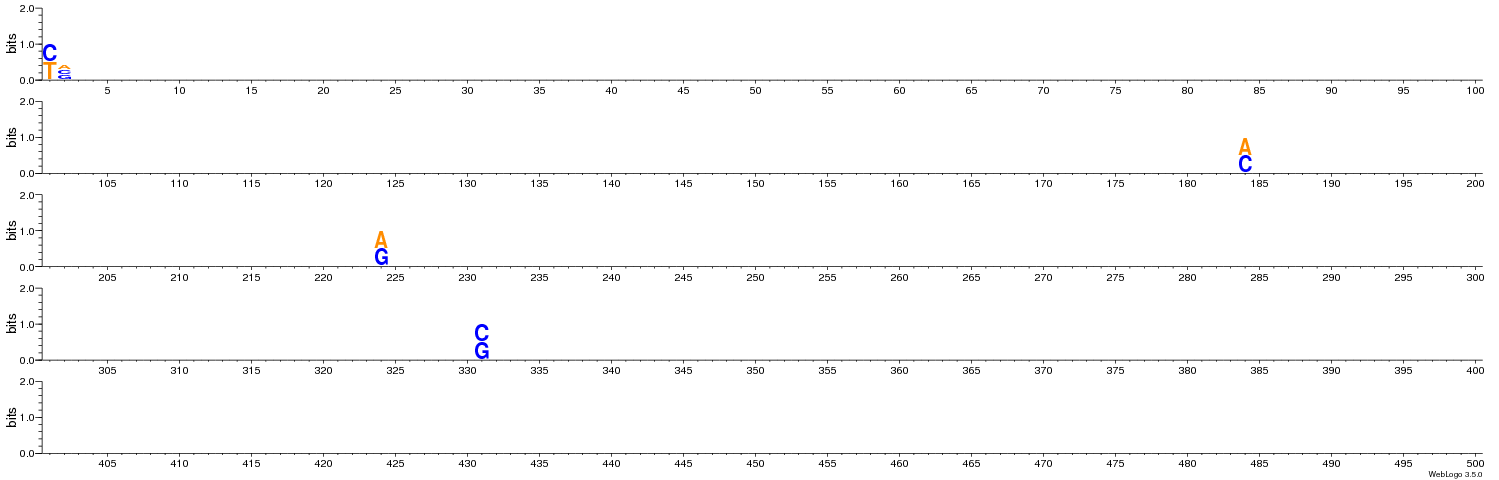

In [359]:
from IPython.display import Image

from weblogolib import *
from io import StringIO

print("Sequence Length", len(sequence))
seqs = ""
# seqs = ">\n"+sequence+"\n"
for (chrom, position), alleles in variants.items():
    for allele in alleles:
        seq = ["-"]*len(sequence)
        seq[start - position] = allele
        seqs += ">\n" + "".join(seq) + "\n"

sequences = read_seq_data(StringIO(seqs))
data = LogoData.from_seqs(sequences)
options = LogoOptions()
options.title = 'A Logo Title'
options.scale_width = False
options.logo_end = 500
options.stacks_per_line = 100
formatting = LogoFormat(data, options)

png = png_formatter(data, formatting)
Image(png)
